<a href="https://colab.research.google.com/github/CtrlJemima/CellphoneDB/blob/master/WAD_24_Likert_scale_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from google.colab import files
uploaded = files.upload()

Saving WAd 24 Likert scale responses.xlsx to WAd 24 Likert scale responses.xlsx


In [6]:
# Load the file (adjust the filename as needed)
file_path = "WAd 24 Likert scale responses.xlsx"
excel_data = pd.ExcelFile(file_path)

In [7]:
# Load Likert-scale data
df = excel_data.parse('Sheet1')

In [8]:
# Reshape from wide to long format
df_long = df.melt(var_name="Statement", value_name="Response")

In [9]:
# Count responses per statement per score
likert_summary = df_long.groupby(["Statement", "Response"]).size().reset_index(name="Count")

In [10]:
# Sort for consistent plotting
likert_summary = likert_summary.sort_values(by=["Statement", "Response"])

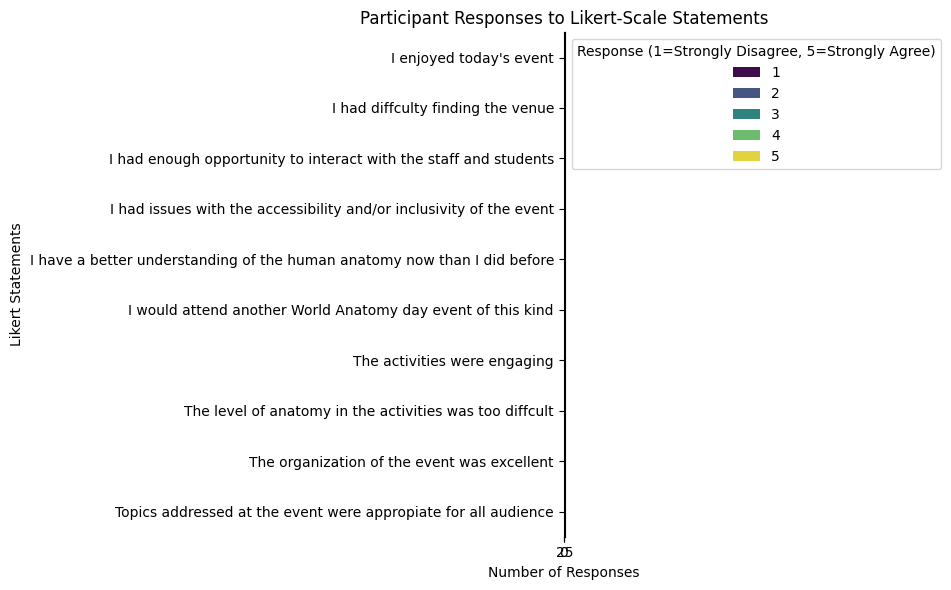

In [11]:
plt.figure(figsize=(10, 6))
sns.barplot(data=likert_summary, x="Count", y="Statement", hue="Response", palette="viridis")

plt.title("Participant Responses to Likert-Scale Statements")
plt.xlabel("Number of Responses")
plt.ylabel("Likert Statements")
plt.legend(title="Response (1=Strongly Disagree, 5=Strongly Agree)", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

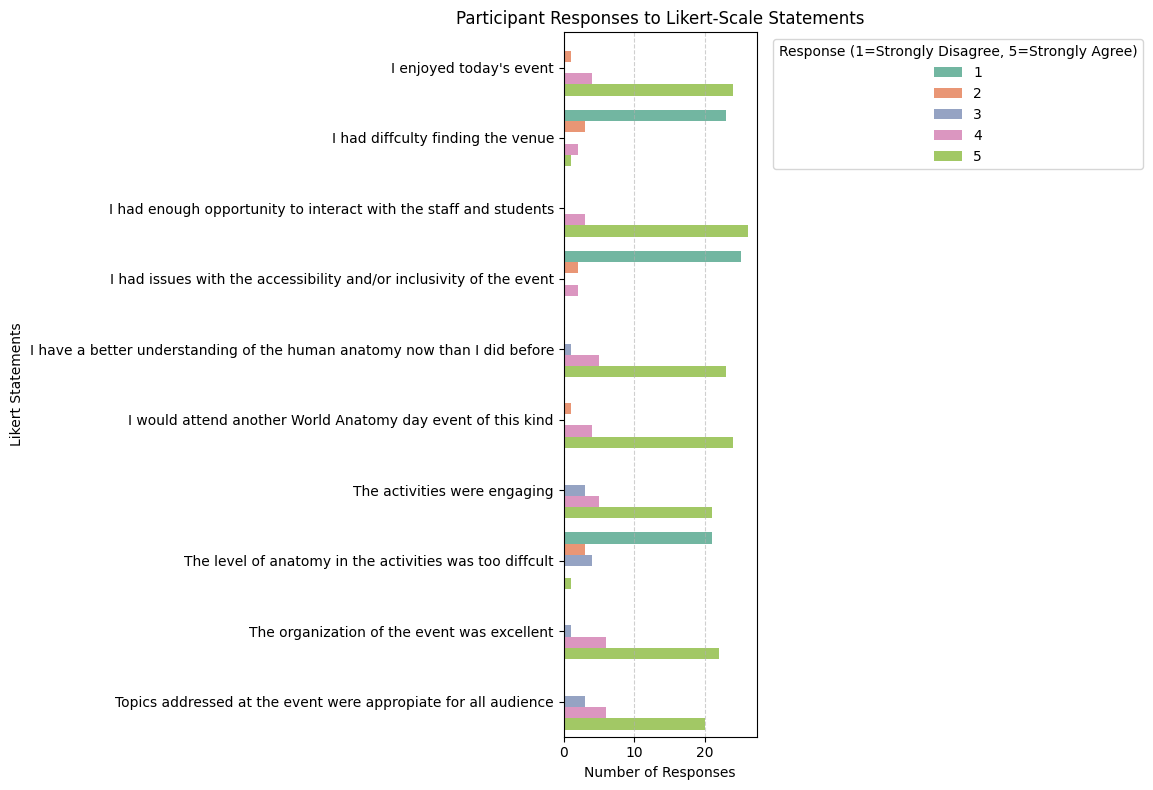

In [16]:
# Convert responses to numeric in case of text/NaNs
df_long["Response"] = pd.to_numeric(df_long["Response"], errors='coerce')

# Drop any missing or invalid responses
df_long = df_long.dropna(subset=["Response"])

# Count valid responses per statement per score
likert_summary = df_long.groupby(["Statement", "Response"]).size().reset_index(name="Count")

# Sort responses numerically for consistent bar grouping
likert_summary = likert_summary.sort_values(by=["Statement", "Response"])

# Plot again
plt.figure(figsize=(12, 8))
sns.barplot(data=likert_summary, x="Count", y="Statement", hue="Response", palette="Set2")

plt.title("Participant Responses to Likert-Scale Statements")
plt.xlabel("Number of Responses")
plt.ylabel("Likert Statements")
plt.legend(title="Response (1=Strongly Disagree, 5=Strongly Agree)", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

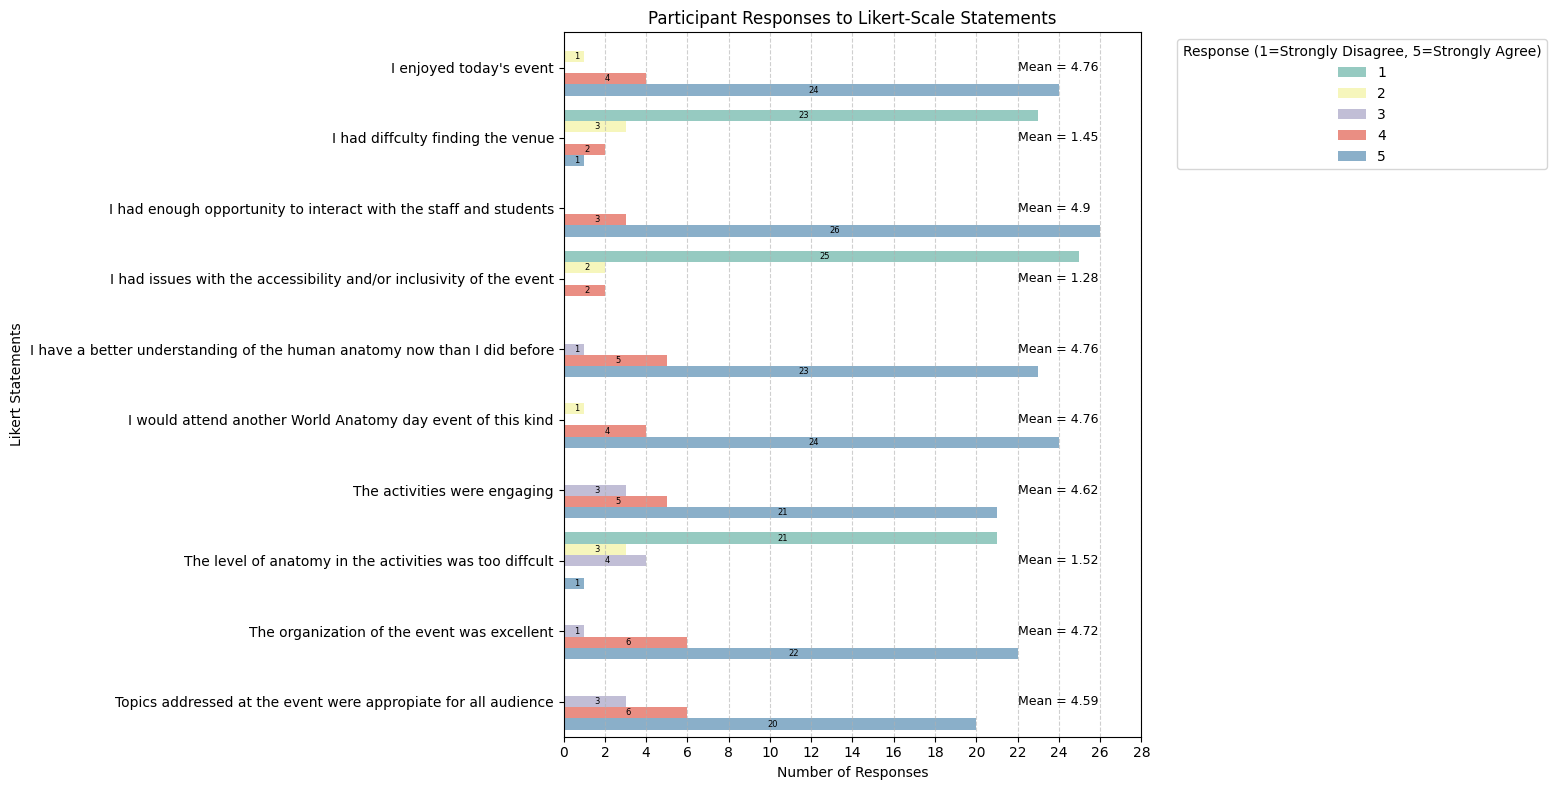

In [33]:
# Calculate means
means = df_long.groupby("Statement")["Response"].mean().round(2)

# Plot
plt.figure(figsize=(16, 8))
ax = sns.barplot(data=likert_summary, x="Count", y="Statement", hue="Response", palette="Set3")

# Add mean score next to each statement
for i, statement in enumerate(means.index):
    ax.text(22, i, f"Mean = {means[statement]}", va='center', fontsize=9, color='black')

for container in plt.gca().containers:
    plt.bar_label(container, label_type='center', fontsize=6, padding=2)

plt.title("Participant Responses to Likert-Scale Statements")
plt.xlabel("Number of Responses")
plt.ylabel("Likert Statements")
plt.legend(title="Response (1=Strongly Disagree, 5=Strongly Agree)", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(range(0, 30, 2))
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig("likert_bar_chart.png", dpi=300, bbox_inches='tight')
plt.show()

In [34]:
from google.colab import files
files.download("likert_bar_chart.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>